In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"minzzzzi","key":"74a980fb52033cf0ead89c84120a4a9c"}'}

In [2]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle

Uninstalling kaggle-1.5.9:
  Successfully uninstalled kaggle-1.5.9
     |████████████████████████████████| 1.5MB 6.8MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 58 kB 3.1 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.9-py3-none-any.whl size=73265 sha256=f7b834da783dad92247b55dc9126e62c41c4b3b89723c133dc35d6040781442c
  Stored in directory: /root/.cache/pip/wheels/9d/50/3d/2644504bb1e8c782f3fef5984f03d76fc4a74698fdec128b29
Successfully built kaggle


In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c sejongai-challenge-pretest-2

  0% 0.00/24.4k [00:00<?, ?B/s]
100% 24.4k/24.4k [00:00<00:00, 24.1MB/s]


In [6]:
!unzip sejongai-challenge-pretest-2.zip

Archive:  sejongai-challenge-pretest-2.zip
  inflating: 2020.AI.bike-submission.csv  
  inflating: 2020.AI.bike-test.csv   
  inflating: 2020.AI.bike-train.csv  


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train = pd.read_csv('2020.AI.bike-train.csv')
test = pd.read_csv('2020.AI.bike-test.csv')
submit = pd.read_csv('2020.AI.bike-submission.csv')

In [10]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,831.416000,11.886000,16.829000,0.033000,2.464600,52.012000,1412.057000,0.038480,57.44900,30.244000,110.693000
std,478.707068,6.707757,5.196688,0.178726,1.386726,20.288358,575.842011,0.019338,30.79558,14.553428,83.867506
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,12.00000,9.000000,1.000000
25%,424.500000,6.000000,13.100000,0.000000,1.400000,36.000000,910.500000,0.024000,36.00000,20.000000,37.000000
50%,832.500000,12.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.038000,52.00000,26.000000,100.000000
75%,1247.500000,18.000000,20.100000,0.000000,3.400000,68.250000,1991.000000,0.051250,70.00000,37.000000,153.000000
max,1653.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.106000,269.00000,90.000000,431.000000


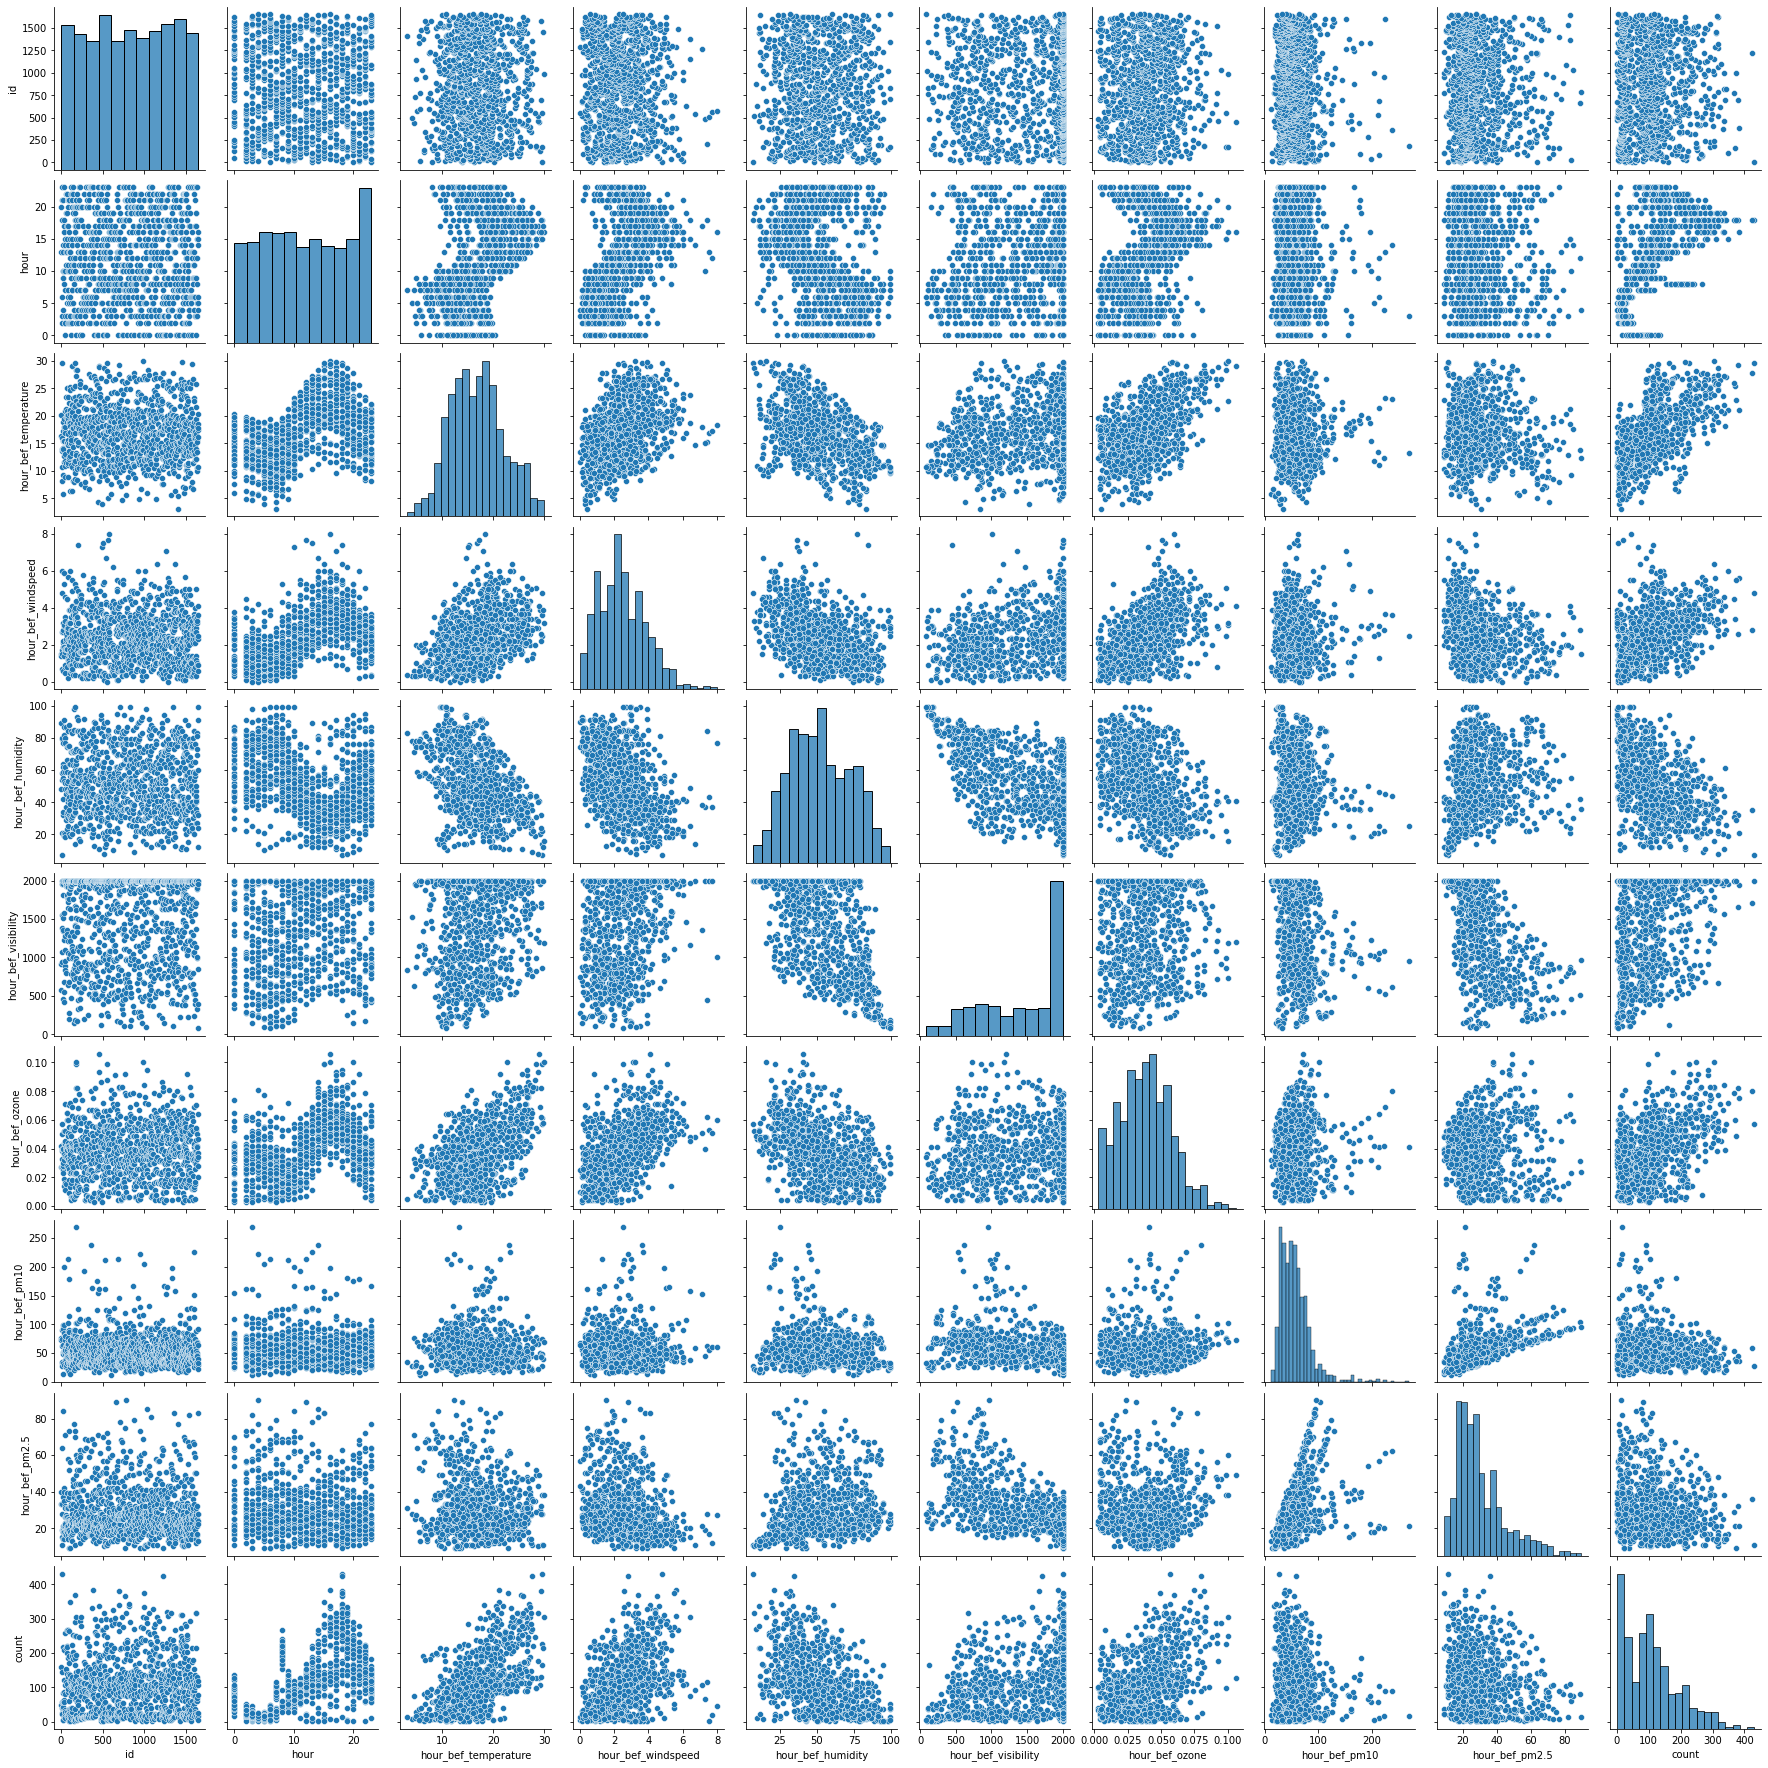

In [25]:
sns.pairplot(data = train)

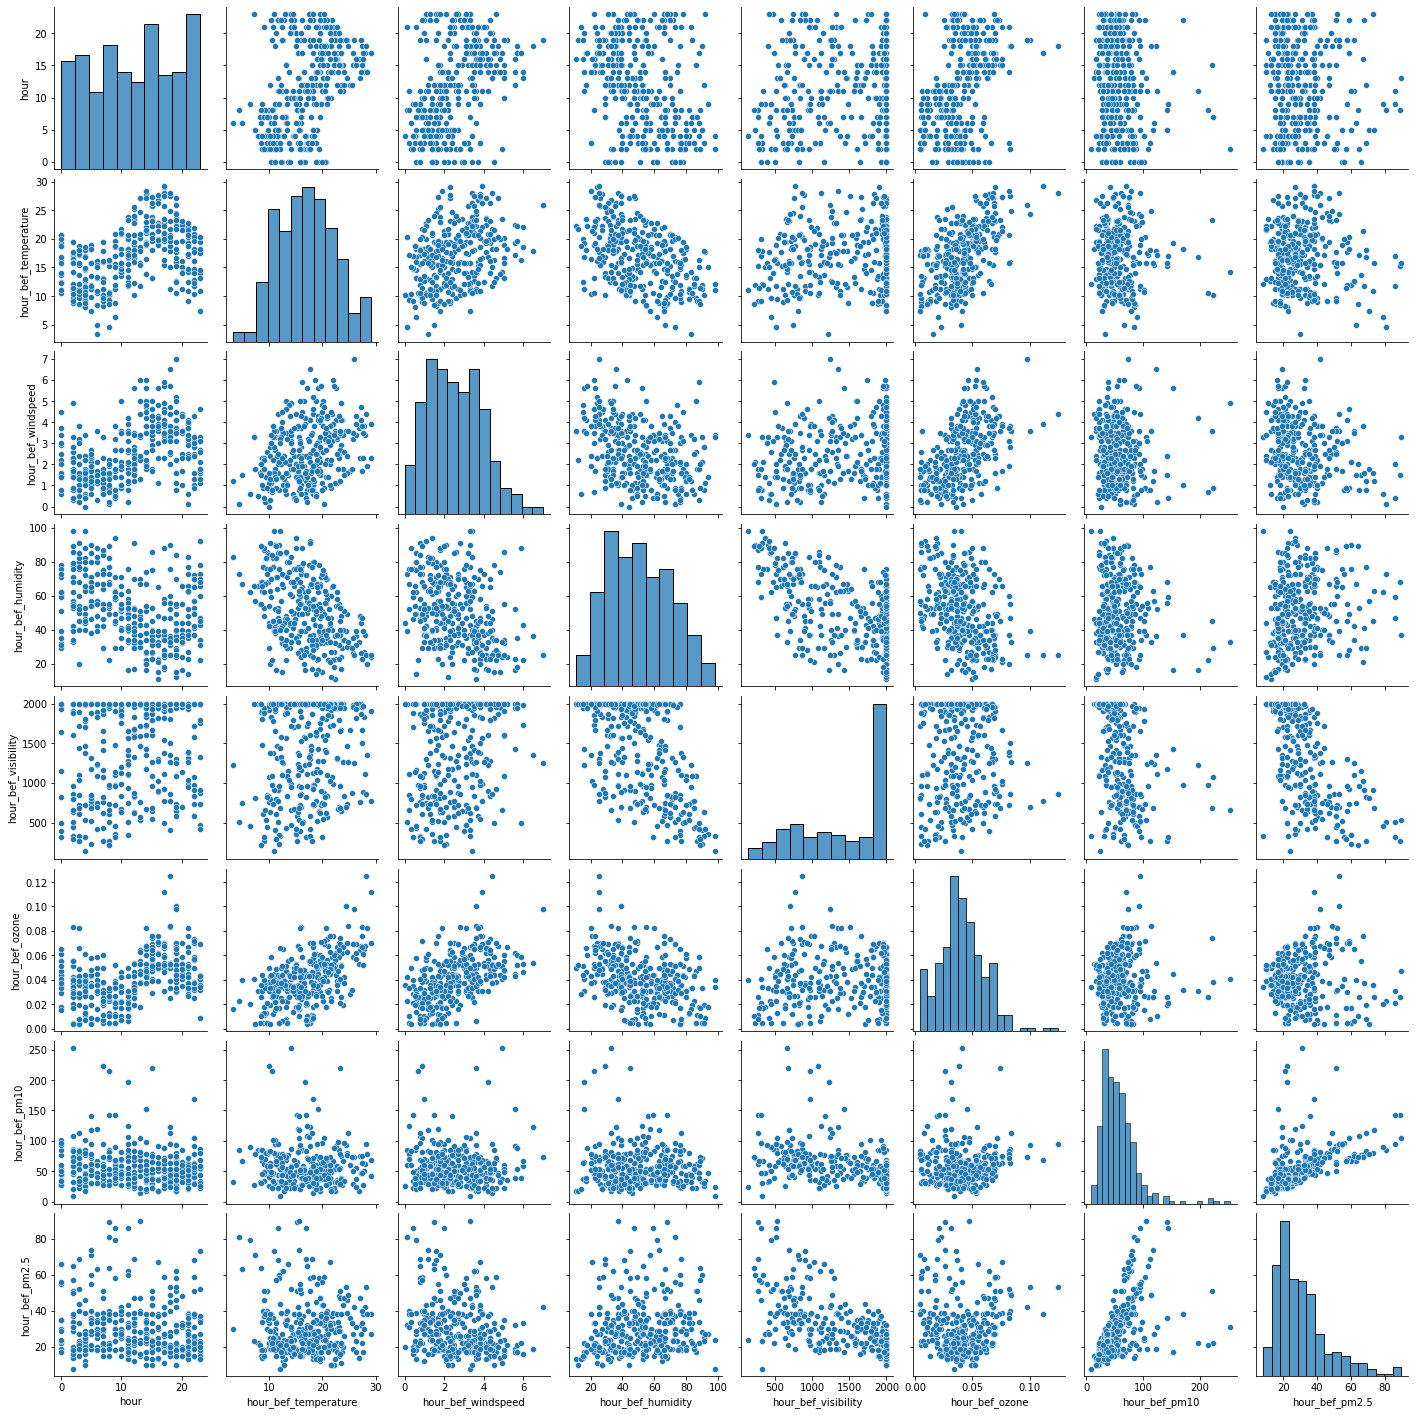

In [23]:
sns.pairplot(x_test)

In [13]:
train.drop('hour_bef_precipitation',inplace= True,axis = 1)
train[:5]

,id,hour,hour_bef_temperature,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [14]:
test.drop('hour_bef_precipitation',inplace= True,axis = 1)

In [16]:
x_train = train.loc[:,'hour':'hour_bef_pm2.5']
y_train = train.loc[:,'count']

x_test = test.loc[:,'hour':'hour_bef_pm2.5']

In [33]:
from sklearn.preprocessing import Normalizer, MinMaxScaler,StandardScaler
mm = MinMaxScaler()

x_train_mm = mm.fit_transform(x_train)
x_test_mm = mm.fit_transform(x_test)

In [34]:
from xgboost import XGBRegressor
XGB = XGBRegressor(learning_rate=0.1,max_depth=7,n_estimators=100)

XGB.fit(x_train_mm,y_train)

[07:14:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [19]:
from sklearn.metrics import mean_squared_error

In [36]:
train_pred = XGB.predict(x_train_mm)
print(mean_squared_error(y_train,train_pred))

29.84863870597961


In [24]:
submit[:5]

,id,count
0,0.0,0.0
1,0.0,1.0
2,0.0,2.0
3,0.0,3.0
4,0.0,4.0


In [37]:
test_pred = XGB.predict(x_test_mm)

for i in range(len(test_pred)):
  submit['id'][i] = i
  submit['count'][i] = test_pred[i]

submit[:5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,id,count
0,0,15.330019
1,1,236.552719
2,2,112.078789
3,3,30.785303
4,4,89.736084


In [38]:
submit['id'] = submit['id'].astype(int)

In [28]:
submit[:5]

,id,count
0,0,14.452777
1,1,233.757202
2,2,114.540535
3,3,29.307678
4,4,102.148186


In [39]:
submit.to_csv('submission.csv',header=True,index=None)

In [40]:
!kaggle competitions submit -c sejongai-challenge-pretest-2 -f submission.csv -m "XGB"

100% 7.05k/7.05k [00:05<00:00, 1.37kB/s]
Successfully submitted to 따릉이 사용자 예측 문제